## Analyzing New York Red Bulls 2024 Performance in MLS Games

## Context
The New York Red Bulls, aka RBNY, are one of the teams in Major League Soccer (MLS). They are one of the ten charter clubs of MLS, having competed in the league since its founding in 1996.

 vs NYCFC game?

1. Performance of team across years: dot plot of goals/games across years. the question, are they improving overall as a team.
2. Gather info across the years to see what characteristics for attackers, defenders, midfielders allows for higher goal scoring. 3 Heat maps. 
3. on an individual basis, how can these characteristics help the players improve. do they have values that are outliers which they should focus on.
4. tableau dashboard.


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

## Team performance across years


Question: Is the performance of RBNY team improving over the years?



Analysis: The points per game (PPG) have been calculated from 2010 to 2024 which is a measure to assess the teams performance. 

$$
\displaystyle
ppg = \frac{3 \cdot \sum win + \sum draw}{\sum game}
$$

Finding: No overall improvement has been noted. However, the two extreme points were 2018 with high result (2.10 ppg) and 2023 with bad result (1.24 ppg). Lets evaluate what factors might have contributed to such different results.

Load data

In [ ]:
# Function to load all sheets from an Excel file
def load_excel_sheets(file, skiprow, year):
    # Load all sheets, skipping the necessary rows
    sheets = pd.read_excel(file, sheet_name=None, skiprows=skiprow)
    dataframes = {}
    
    # Create a DataFrame for each sheet with an appropriate name
    for sheet_name, df in sheets.items():
        sheet_name = sheet_name.lower()
        # Assign to a properly named variable
        df_name = f"{sheet_name}_{year}"
        dataframes[df_name] = df
    
    return dataframes

In [56]:
# Load the Excel file with all sheets
excel_data = pd.ExcelFile("RBNY_yearly_stats/scores_over_time.xlsx" )

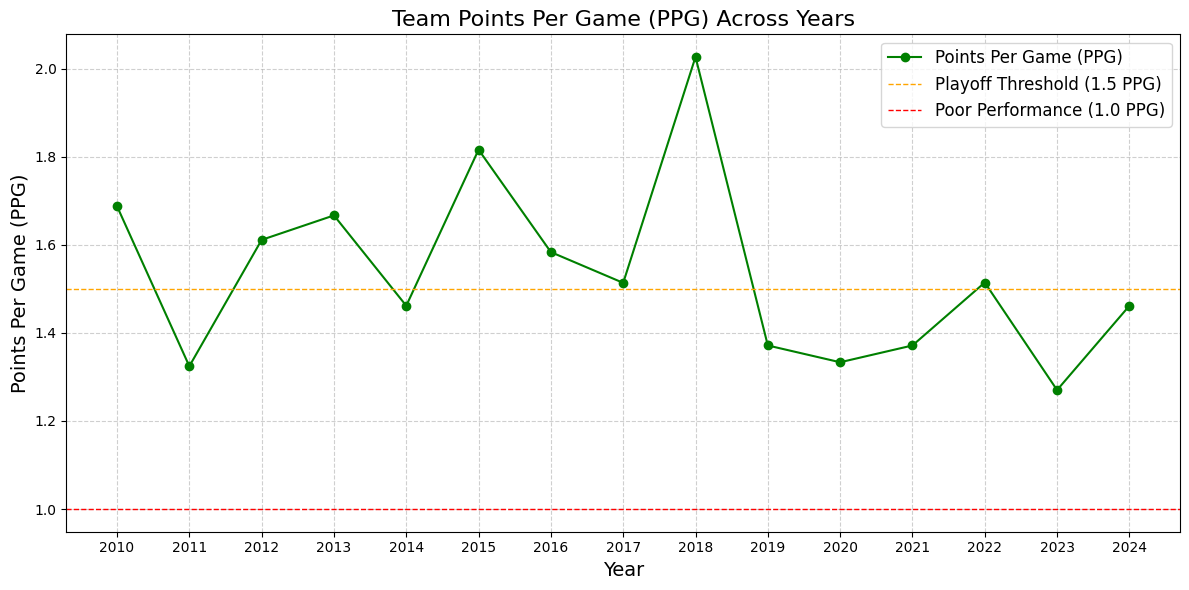

In [ ]:
# Initialize a dictionary to store Points Per Game (PPG) for each year
ppg_metrics = {}

# Iterate through each sheet (year)
for sheet_name in excel_data.sheet_names:
    # Load the sheet into a DataFrame
    df = excel_data.parse(sheet_name)
    
    # Ensure the required columns exist
    if {"Result"}.issubset(df.columns):
        df.columns = df.columns.str.strip()  # Remove any leading/trailing spaces

        # Calculate Wins, Draws, and Total Games
        wins = (df["Result"] == "W").sum()
        draws = (df["Result"] == "D").sum()
        games = len(df)

        # Calculate Points Per Game (PPG)
        if games > 0:
            ppg = (3 * wins + draws) / games
            try:
                year = int(sheet_name)  # Ensure the sheet name is a valid year
                ppg_metrics[year] = ppg
            except ValueError:
                print(f"Skipping sheet '{sheet_name}' as it does not represent a year.")

# Convert the PPG metrics into a DataFrame
ppg_df = pd.DataFrame(list(ppg_metrics.items()), columns=["Year", "PPG"])
ppg_df = ppg_df.sort_values("Year")  # Sort the DataFrame by year

# Plot PPG across years
plt.figure(figsize=(12, 6))
plt.plot(ppg_df["Year"], ppg_df["PPG"], marker='o', linestyle='-', color='green', label="Points Per Game (PPG)")
plt.axhline(1.5, color='orange', linestyle='--', linewidth=1, label="Playoff Threshold (1.5 PPG)")
plt.axhline(1.0, color='red', linestyle='--', linewidth=1, label="Poor Performance (1.0 PPG)")
plt.title("Team Points Per Game (PPG) Across Years", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.ylabel("Points Per Game (PPG)", fontsize=14)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(fontsize=12)
plt.xticks(ppg_df["Year"])  # Ensure the x-axis shows all years
plt.tight_layout()
plt.show()


## Understanding the Performance Gap from 2018 to 2024

Analysis: 
- Calculate the average and standard deviation for all metrics from both 2018 and 2024 files. This data will be segmented for each player roles as each roles are expected to contribute differently to the game. As such, certain roles have specific metrics at which they need to perform.

In [49]:
# display all columns
pd.set_option('display.max_columns', None)


Set all sheets from 2018 and 2024 RBNY Stats into dataframe

In [ ]:



data_2018 = load_excel_sheets("RBNY_yearly_stats/main_stats/all_2018_stats.xlsx", 2018)
data_2024 = load_excel_sheets("RBNY_yearly_stats/main_stats/all_2024_stats.xlsx", 2024)

# Combine all DataFrames into one dictionary for easier access
all_data = {**data_2018, **data_2024}

# Print loaded DataFrame names for reference
print("Loaded DataFrames:")
for df_name in all_data.keys():
    print(df_name)

# Example: Access a specific DataFrame
# For example, general_stats_2018 or general_stats_2024
general_stats_2018 = all_data.get("standard_stats_2018")
general_stats_2024 = all_data.get("standard_stats_2024")


Loaded DataFrames:
standard_stats_2018
goalkeeping_2018
advanced_goalkeeping_2018
shooting_2018
passing_2018
defensive_action_2018
possession_2018
standard_stats_2024
goalkeeping_2024
advanced_goalkeeping_2024
shooting_2024
passing_2024
defensive_action_2024
possession_2024


In [51]:
# Identify the general stats columns (from the first sheet)
general_stats_2018_cols = set(all_data.get("standard_stats_2018", pd.DataFrame()).columns)
general_stats_2024_cols = set(all_data.get("standard_stats_2024", pd.DataFrame()).columns)

# Drop Pos because it must be kept in all sheets
general_stats_2018_cols.discard('Pos')
general_stats_2024_cols.discard('Pos')

print(general_stats_2018_cols)


{'PrgP', 'Nation', 'G-PK.1', 'G+A-PK', 'Matches', 'PrgC', 'G+A', 'npxG+xAG', 'Age', 'Ast', 'Starts', '90s', 'PKatt', 'Ast.1', 'PK', 'xAG', 'G+A.1', 'npxG', 'Min', 'xG+xAG', 'G-PK', 'MP', 'Gls.1', 'CrdR', 'npxG.1', 'xG', 'Player', 'PrgR', 'CrdY', 'xG.1', 'xAG.1', 'npxG+xAG.1', 'Gls'}


Remove repeating columns in different sheets

In [52]:

# Create a new dictionary for non-repeating columns
filtered_data = {}

for df_name, df in all_data.items():
    # Skip the general stats sheets themselves
    if df_name in ["standard_stats_2018", "standard_stats_2024"]:
        filtered_data[df_name] = df
        continue

    # Identify non-repeating columns
    reference_cols = general_stats_2018_cols if "2018" in df_name else general_stats_2024_cols
    non_repeating_cols = [col for col in df.columns if col not in reference_cols]

    # Store only the unique columns in the new DataFrame
    filtered_data[df_name] = df[non_repeating_cols]


# Print filtered DataFrame names
print("Filtered DataFrames (without repeating columns):")
for df_name, df in filtered_data.items():
    print(df_name, df.shape)

Filtered DataFrames (without repeating columns):
standard_stats_2018 (31, 34)
goalkeeping_2018 (2, 15)
advanced_goalkeeping_2018 (2, 26)
shooting_2018 (29, 13)
passing_2018 (29, 21)
defensive_action_2018 (29, 17)
possession_2018 (29, 21)
standard_stats_2024 (33, 34)
goalkeeping_2024 (2, 15)
advanced_goalkeeping_2024 (2, 26)
shooting_2024 (27, 13)
passing_2024 (27, 21)
defensive_action_2024 (27, 17)
possession_2024 (27, 21)


In [8]:
for df_name, df in filtered_data.items():
    print(f"Columns in {df_name}:")
    print(df.columns)
    print("-" * 50)

Columns in standard_stats_2018:
Index(['Player', 'Nation', 'Pos', 'Age', 'MP', 'Starts', 'Min', '90s', 'Gls',
       'Ast', 'G+A', 'G-PK', 'PK', 'PKatt', 'CrdY', 'CrdR', 'xG', 'npxG',
       'xAG', 'npxG+xAG', 'PrgC', 'PrgP', 'PrgR', 'Gls.1', 'Ast.1', 'G+A.1',
       'G-PK.1', 'G+A-PK', 'xG.1', 'xAG.1', 'xG+xAG', 'npxG.1', 'npxG+xAG.1',
       'Matches'],
      dtype='object')
--------------------------------------------------
Columns in goalkeeping_2018:
Index(['Pos', 'GA', 'GA90', 'SoTA', 'Saves', 'Save%', 'W', 'D', 'L', 'CS',
       'CS%', 'PKA', 'PKsv', 'PKm', 'Save%.1'],
      dtype='object')
--------------------------------------------------
Columns in advanced_goalkeeping_2018:
Index(['Pos', 'GA', 'PKA', 'FK', 'CK', 'OG', 'PSxG', 'PSxG/SoT', 'PSxG+/-',
       '/90', 'Cmp', 'Att', 'Cmp%', 'Att (GK)', 'Thr', 'Launch%', 'AvgLen',
       'Att.1', 'Launch%.1', 'AvgLen.1', 'Opp', 'Stp', 'Stp%', '#OPA',
       '#OPA/90', 'AvgDist'],
      dtype='object')
-------------------------------

Determine which metrics are significantly different from 2018 and 2024 data for all 4 player roles

In [ ]:
import pandas as pd
from scipy.stats import ttest_ind

# Mapping of player positions to roles
role_mappings = {
    "Attacker": ["FW", "AM", "LW", "RW"],
    "Midfielder": ["MF", "DM", "CM", "LM", "RM", "WM"],
    "Defender": ["DF", "FB", "LB", "RB", "CB"],
    "Goalkeeper": ["GK"]
}

# Define relevant sheets for each position
role_sheets = {
    "Goalkeeper": ["standard_stats", "goalkeeping", "advanced_goalkeeping"],
    "Defender": ["standard_stats", "defensive_action", "possession"],
    "Midfielder": ["standard_stats", "passing", "possession", "defensive_action"],
    "Attacker": ["standard_stats", "shooting", "possession", "passing"]
}

# Dictionary to store results
role_comparison_results = {}

# Loop through each role
for role, sheets in role_sheets.items():
    print(f"\nProcessing {role}...")

    positions = role_mappings[role]
    role_data = []

    # Extract relevant sheets for the role
    for df_name, df in filtered_data.items():
        sheet_base_name = "_".join(df_name.split("_")[:-1])

        # Skip sheets that are not relevant for this role
        if sheet_base_name not in sheets:
            continue  

        # Ensure "Pos" column exists before filtering
        if "Pos" not in df.columns:
            continue

        # Filter only players that match the role's positions
        df_filtered = df[df["Pos"].apply(lambda x: any(pos in str(x) for pos in positions))]

        # Extract the year from the sheet name
        year = 2018 if "2018" in df_name else 2024

        # Add the year column
        df_filtered["Year"] = year  

        # Append filtered data
        role_data.append(df_filtered)

    # Combine all role-specific data
    if not role_data:
        print(f"⚠️ No data found for {role}, skipping.")
        continue

    role_df = pd.concat(role_data, ignore_index=True)

    # Separate data by year
    role_2018 = role_df[role_df["Year"] == 2018]
    role_2024 = role_df[role_df["Year"] == 2024]

    # Identify numeric columns for statistical testing (EXCLUDE "Year")
    numeric_cols = [col for col in role_df.select_dtypes(include=["number"]).columns if col != "Year"]

    # Perform t-tests for each metric
    p_values = []
    metrics_to_keep = []
    avg_diff = []

    for metric in numeric_cols:
        values_2018 = role_2018[metric].dropna()
        values_2024 = role_2024[metric].dropna()

        if len(values_2018) > 1 and len(values_2024) > 1:
            t_stat, p_val = ttest_ind(values_2018, values_2024, equal_var=False, nan_policy="omit")
            p_values.append(p_val)
            avg_diff.append(values_2018.mean() - values_2024.mean())
            metrics_to_keep.append(metric)

    # Store results in DataFrame
    comparison_df = pd.DataFrame({"Metric": metrics_to_keep, "Avg_Diff": avg_diff, "p-value": p_values})
    comparison_df["Significant"] = comparison_df["p-value"] < 0.05

    # Filter only significant results
    significant_diffs = comparison_df[comparison_df["Significant"]]

    # Store results for this role
    role_comparison_results[role] = significant_diffs

    # Save to CSV
    significant_diffs.to_csv(f"{role.lower()}_significant_differences.csv", index=False)

    #print(f"✅ {role}: {len(significant_diffs)} significant differences found. Results saved.")

# Print summary of findings
for role, df in role_comparison_results.items():
    print(f"\n🔎 Significant differences for {role}:")
    print(df if not df.empty else "No significant differences found.")



Processing Goalkeeper...

Processing Defender...

Processing Midfielder...

Processing Attacker...

🔎 Significant differences for Goalkeeper:
No significant differences found.

🔎 Significant differences for Defender:
     Metric     Avg_Diff   p-value  Significant
54  Carries  -316.848485  0.041022         True
55  TotDist -1586.989899  0.044334         True
61      Rec  -371.333333  0.034506         True

🔎 Significant differences for Midfielder:
    Metric   Avg_Diff   p-value  Significant
32    Cmp% -11.100000  0.007049         True
40  Cmp%.2 -15.985000  0.001442         True
43  Cmp%.3 -20.848333  0.009102         True

🔎 Significant differences for Attacker:
    Metric   Avg_Diff   p-value  Significant
52  Cmp%.2 -13.608333  0.002913         True


/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_1700/1287204809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Year"] = year
/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_1700/1287204809.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Year"] = year
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic can

Segment and average all metrics from 2018 and 2024 files based on player roles (attackers, midfielder, defenders, goalkeeper)


In [ ]:

# Function to segment and analyze data based on roles
def segment_and_analyze(dataframes):
    segmented_stats = {}

    # Mapping of player positions to their role category
    role_mappings = {
        "Attacker": ["FW", "AM", "LW", "RW"],
        "Midfielder": ["MF", "DM", "CM", "LM", "RM", "WM"],
        "Defender": ["DF", "FB", "LB", "RB", "CB"],
        "Goalkeeper": ["GK"]
    }

    for role, positions in role_mappings.items():
        role_stats = []

        for df_name, df in dataframes.items():
            # Extract base sheet name (excluding year)
            sheet_base_name = "_".join(df_name.split("_")[:-1])

            # Skip sheets not relevant to this role
            if sheet_base_name not in role_sheets[role]:
                continue

            # Ensure "Pos" column exists in the DataFrame
            if "Pos" not in df.columns:
                continue

            # Filter rows where the position matches the current role
            role_df = df[df["Pos"].apply(
                lambda x: any(pos in positions for pos in str(x).split(","))
            )]

            # **Ensure numeric columns are from `filtered_data` only**
            numeric_cols = role_df.select_dtypes(include=["number"]).copy()

            # If there are no numeric columns, skip this iteration
            if numeric_cols.empty:
                continue

            # Calculate mean and std
            mean_stats = numeric_cols.mean().rename("Mean")
            std_stats = numeric_cols.std().rename("Std")

            # Create summary DataFrame
            summary_df = pd.concat([mean_stats, std_stats], axis=1).reset_index()
            summary_df.columns = ["Metric", "Mean", "Std"]
            summary_df["Sheet"] = df_name  # Track which sheet this data came from
            summary_df["Year"] = df_name[-4:]  # Extract year from sheet name

            # Append to role_stats
            role_stats.append(summary_df)

        # Combine all summaries for this role
        if role_stats:
            segmented_stats[role] = pd.concat(role_stats, ignore_index=True)

    return segmented_stats

# Ensure we're using the filtered data
segmented_stats = segment_and_analyze(filtered_data)

# Save results
for role, stats in segmented_stats.items():
    stats.to_csv(f"RBNY_yearly_stats/{role.lower()}_stats_summary.csv", index=False)
    print(f"Summary for {role} saved to {role.lower()}_stats_summary.csv")


Summary for Attacker saved to attacker_stats_summary.csv
Summary for Midfielder saved to midfielder_stats_summary.csv
Summary for Defender saved to defender_stats_summary.csv
Summary for Goalkeeper saved to goalkeeper_stats_summary.csv


Visualize the significant metrics averages based on their roles

defender: Carries, TotDist, Rec
midfielder: Cmp%, Cmp%.2, Cmp%.3 
attacker: Cmp%.2
goalkeeper: none

In [23]:
attacker_summary = pd.read_csv('attacker_stats_summary.csv')
print(attacker_summary)

     Metric        Mean         Std                Sheet  Year
0       Age   23.071429    3.852358  standard_stats_2018  2018
1        MP   13.357143   12.701345  standard_stats_2018  2018
2    Starts    8.000000    9.429903  standard_stats_2018  2018
3       Min  803.461538  843.352300  standard_stats_2018  2018
4       90s    8.915385    9.376020  standard_stats_2018  2018
..      ...         ...         ...                  ...   ...
159     1/3   13.333333   13.257074      possession_2024  2024
160     CPA    9.888889    9.980537      possession_2024  2024
161     Mis   29.666667   27.221315      possession_2024  2024
162     Dis   12.333333   11.586630      possession_2024  2024
163     Rec  278.111111  253.108892      possession_2024  2024

[164 rows x 5 columns]


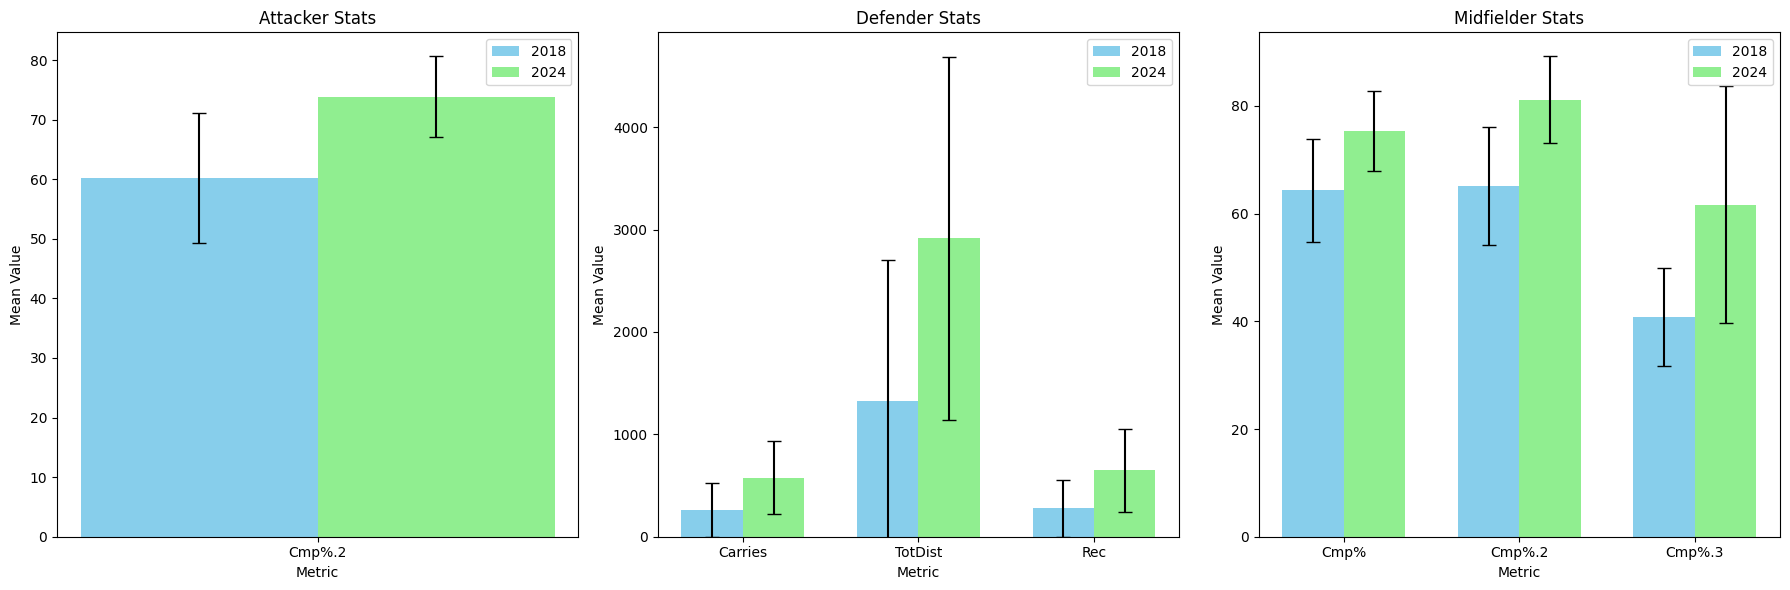

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load data
attacker_summary = pd.read_csv('attacker_stats_summary.csv')
defender_summary = pd.read_csv('defender_stats_summary.csv')
midfielder_summary = pd.read_csv('midfielder_stats_summary.csv')

# Correct filtering using `.isin()`
filtered_attacker = attacker_summary[attacker_summary['Metric'] == 'Cmp%.2']
filtered_defender = defender_summary[defender_summary['Metric'].isin(['Carries', 'TotDist', 'Rec'])]
filtered_midfielder = midfielder_summary[midfielder_summary['Metric'].isin(['Cmp%', 'Cmp%.2', 'Cmp%.3'])]

# Create subplots (1 row, 3 columns)
fig, axes = plt.subplots(1, 3, figsize=(18, 6))  # Independent y-axes

# Function to plot bar chart with centered error bars and separate bars for 2018 and 2024
def plot_with_errorbars(ax, data, title):
    metrics = data['Metric'].unique()
    bar_width = 0.35  # Width of the bars
    x_positions = np.arange(len(metrics))  # X positions for bars
    
    # Check if the plot is for Attacker, adjust x_position for one metric
    if title == "Attacker Stats":
        x_positions = [0]  # Only one metric, place it at x = 0

    # Plot bars for 2018 and 2024 (side by side)
    for i, metric in enumerate(metrics):
        metric_data_2018 = data[(data['Metric'] == metric) & (data['Year'] == 2018)]
        metric_data_2024 = data[(data['Metric'] == metric) & (data['Year'] == 2024)]
        
        ax.bar(x_positions[i] - bar_width / 2, metric_data_2018['Mean'], width=bar_width, color='skyblue', label='2018' if i == 0 else "", yerr=metric_data_2018['Std'], capsize=5)
        ax.bar(x_positions[i] + bar_width / 2, metric_data_2024['Mean'], width=bar_width, color='lightgreen', label='2024' if i == 0 else "", yerr=metric_data_2024['Std'], capsize=5)
    
    # Add labels and title
    ax.set_title(title)
    ax.set_xticks(x_positions)
    ax.set_xticklabels(metrics)
    ax.set_xlabel("Metric")
    ax.set_ylabel("Mean Value")
    ax.set_ylim(bottom=0)  # Ensure y-axis starts at 0
    ax.legend()

# Plot for Attackers
plot_with_errorbars(axes[0], filtered_attacker, "Attacker Stats")

# Plot for Defenders
plot_with_errorbars(axes[1], filtered_defender, "Defender Stats")

# Plot for Midfielders
plot_with_errorbars(axes[2], filtered_midfielder, "Midfielder Stats")

# Adjust layout for clarity
plt.tight_layout()
plt.show()


In [55]:
import pandas as pd

# Assuming 'filtered_data' contains DataFrames like standard_stats_2018, goalkeeping_2024, etc.
# Create an empty list to store DataFrames
all_data = []

# Iterate over each DataFrame in the filtered_data
for df_name, df in filtered_data.items():
    # Extract the year from the DataFrame name
    year = df_name.split('_')[-1]  # Assuming the format 'metric_year' (e.g., 'standard_stats_2018')
    
    # Add a new 'Year' column to the DataFrame
    df['Year'] = int(year)
    
    # Append the DataFrame to the list
    all_data.append(df)

# Combine all DataFrames into one
combined_data = pd.concat(all_data, ignore_index=True)

# Check the resulting DataFrame
print(combined_data.head())


        Player  Nation Pos   Age    MP  Starts     Min   90s  Gls   Ast   G+A  \
0   Aaron Long  us USA  DF  25.0  34.0    31.0  2808.0  31.2  3.0   1.0   4.0   
1  Luis Robles  us USA  GK  33.0  31.0    31.0  2790.0  31.0  0.0   0.0   0.0   
2   Sean Davis  us USA  MF  24.0  32.0    30.0  2574.0  28.6  0.0   4.0   4.0   
3   Tim Parker  us USA  DF  24.0  29.0    29.0  2610.0  29.0  1.0   2.0   3.0   
4         Kaku  py PAR  MF  23.0  30.0    29.0  2410.0  26.8  6.0  10.0  16.0   

   G-PK   PK  PKatt  CrdY  CrdR   xG  npxG  xAG  npxG+xAG  PrgC   PrgP   PrgR  \
0   3.0  0.0    0.0   1.0   0.0  2.6   2.6  0.5       3.1   4.0   97.0    8.0   
1   0.0  0.0    0.0   1.0   0.0  0.0   0.0  0.3       0.3   0.0    0.0    0.0   
2   0.0  0.0    0.0   1.0   0.0  0.4   0.4  3.6       4.0  24.0  202.0   42.0   
3   1.0  0.0    0.0   5.0   0.0  2.9   2.9  1.1       4.0   4.0  101.0    4.0   
4   4.0  2.0    3.0   5.0   0.0  7.1   4.7  7.2      11.9  43.0  242.0  191.0   

   Gls.1  Ast.1  G+A.1  G-

/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_1700/1682756262.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = int(year)
/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_1700/1682756262.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Year'] = int(year)
/var/folders/1d/g2bbz7517zxggtl9j5jk741r0000gn/T/ipykernel_1700/1682756262.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_index

Do correlation between all metrics and ppg to determine which metric predicts the team performance

Focus on the significant metrics that are considered important for the specific player role.
- expplain the difference betwene 2018 and 2024. does it make sence based on the high performance in 2018?

Maybe look at specific players and their performance based on avgs.

In [11]:
# Sample classification of players (this should be updated with accurate roles)
player_roles = {
    "Morgan": "Midfielder", "Forsberg": "Midfielder", "Manoel": "Attacker", "Harper": "Attacker", "Vanzeir": "Attacker", "Carmona": "Midfielder",
    "Gjengaar": "Attacker", "Hall": "Attacker", "Tolkin": "Defender", "Amaya": "Midfielder", "Burke": "Attacker", "Carballo": "Midfielder",
    "Duncan": "Defender", "Ngoma": "Attacker", "Reyes": "Defender", "Estrela": "Midfielder", "Marcucci": "Goalkeeper", "Mitchell": "Attacker",
    "O'Connor": "Defender", "Odle": "Goalkeeper", "Ofori": "Defender", "Rosborough": "Midfielder", "Sofo": "Attacker", "Sserwadda": "Midfielder",
    "Valencia": "Defender", "Alexandre": "Defender", "Coronel": "Goalkeeper", "Donkor": "Midfielder", "Edelman": "Midfielder", "Eile": "Defender",
    "Kasule": "Midfielder", "Meara": "Goalkeeper", "Meyer": "Goalkeeper", "Mina": "Defender", "Mullings": "Attacker", "Nealis": "Defender",
    "Nealis": "Defender", "Shapiro-Thompson": "Midfielder", "Stokes": "Goalkeeper", "Stroud": "Midfielder",
    "Martínez": "Attacker", "Rodríguez": "Midfielder", "Wolf": "Attacker", "Bakrar": "Attacker", "Ojeda": "Attacker", "Perea": "Midfielder",
    "Fernández": "Attacker", "Parks": "Midfielder", "Gray": "Defender", "Ilenic": "Defender", "Jones": "Attacker", "Magno": "Attacker",
    "Thiago": "Defender", "Moralez": "Midfielder", "O'Toole": "Attacker", "Sands": "Midfielder", "Arroyave": "Midfielder", "Baiera": "Defender",
    "Carrizo": "Midfielder", "Elias": "Midfielder", "Hope-Gund": "Defender",  "Jasson": "Midfielder", "Acevedo": "Midfielder", "Andrade": "Attacker",
    "Barraza": "Goalkeeper", "Benalcazar": "Defender", "Denis": "Attacker", "Freese": "Goalkeeper", "Haak": "Midfielder", "McFarlane": "Defender",
    "Mijatovic": "Attacker", "Mizell": "Goalkeeper", "Morales": "Midfielder", "Owusu": "Defender", "Pellegrini": "Midfielder", "Rando": "Goalkeeper",
    "Risa": "Defender", "Romero": "Goalkeeper", "Segal": "Attacker", "Shore": "Midfielder", "Tanasijević": "Defender", "Turnbull": "Defender",
    "Yañez": "Attacker", "Martins": "Midfielder", "Tanasijevic": "Defender"
}

In [12]:
# Load player stats data for 2024 mls games
rbny_avg_season = pd.read_excel('rbny_stats_2024/files/avg_mls_stats.xlsx')
nyc_avg_season = pd.read_excel('nycfc_stats_2024/files/avg_mls_stats.xlsx')

# Load player stats data for 2024 mls games
rbny_season = pd.read_excel('rbny_stats_2024/files/season_stats_per_player.xlsx')
nyc_season = pd.read_excel('nycfc_stats_2024/files/season_stats_per_player.xlsx')

# Load the game-specific data for RBNY and NYC
rbny_game = pd.read_excel('rbny_stats_2024/files/game_stats_sept_18.xlsx')
nyc_game = pd.read_excel('nycfc_stats_2024/files/game_stats_sept_18.xlsx')


# Add 'Team' column to distinguish the team of each player
rbny_avg_season['Team'] = 'RBNY'
rbny_season['Team'] = 'RBNY'
rbny_game['Team'] = 'RBNY'

nyc_avg_season['Team'] = 'NYCFC'
nyc_season['Team'] = 'NYCFC'
nyc_game['Team'] = 'NYCFC'

# Concatenate the two datasets into one
combined_season_avg = pd.concat([rbny_avg_season, nyc_avg_season], ignore_index=True)
combined_season = pd.concat([rbny_season, nyc_season], ignore_index=True)
combined_game = pd.concat([rbny_game, nyc_game], ignore_index=True)

# Add role column based on the player names and player_roles
combined_season_avg['Role'] = combined_season_avg['Last Name'].map(player_roles)
combined_season['Role'] = combined_season['Last Name'].map(player_roles)
combined_game['Role'] = combined_game['Last Name'].map(player_roles)

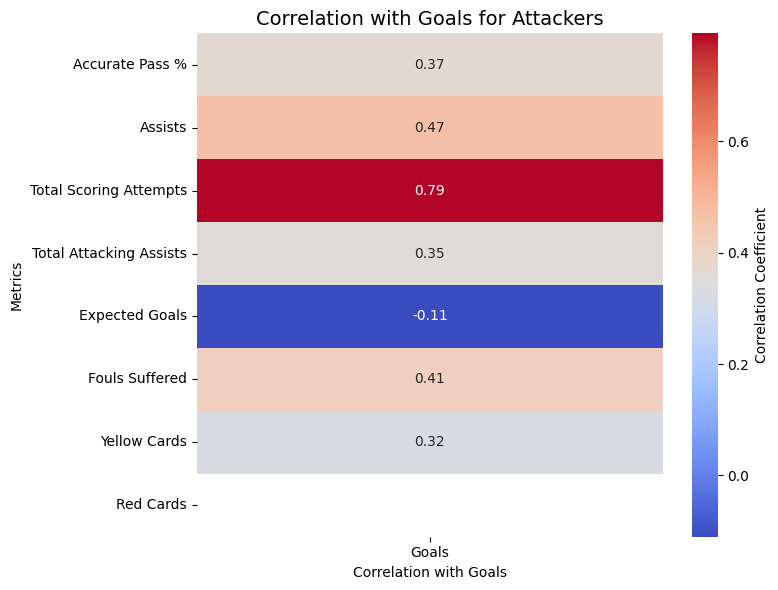

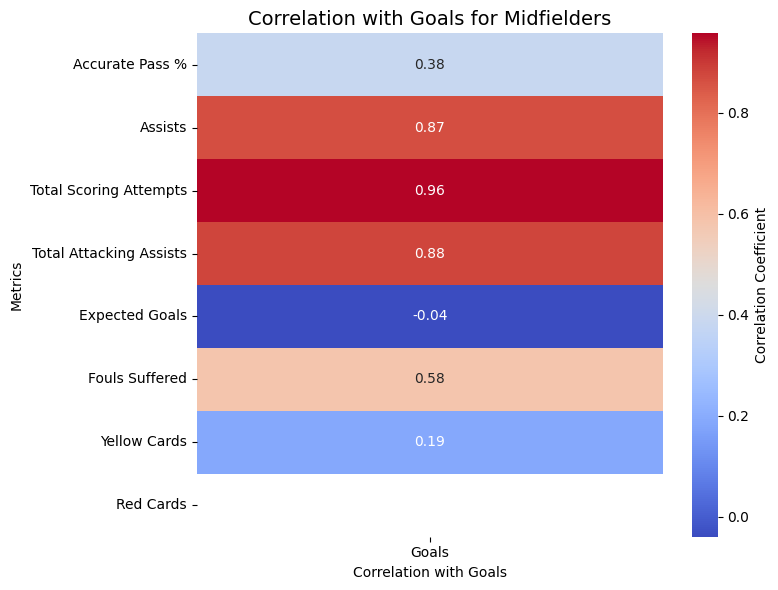

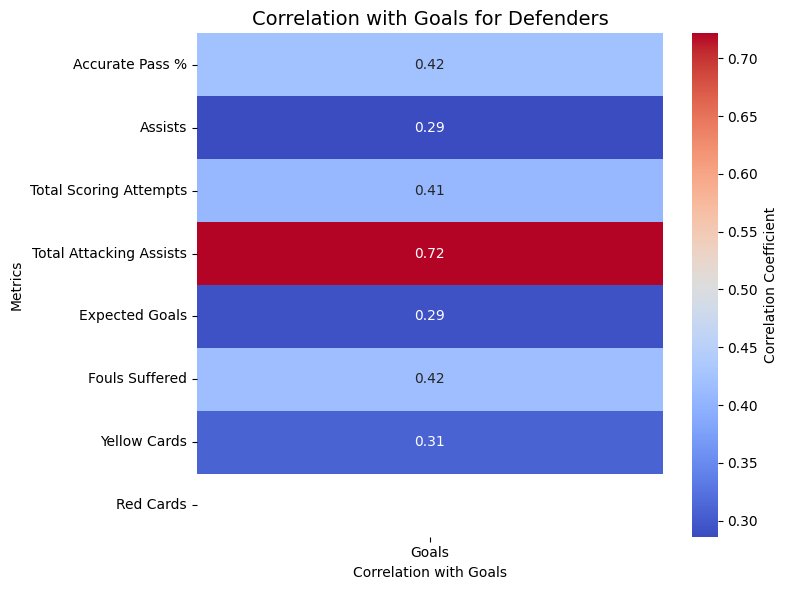

In [13]:
# Filter to keep only numeric columns
columns_to_plot = [col for col in combined_season_avg.columns.intersection(combined_game.columns) if pd.api.types.is_numeric_dtype(combined_season_avg[col])]

# Filter data by Role
roles = ['Attacker', 'Midfielder', 'Defender']

# Plot correlation heatmap for each role
for role in roles:
    # Filter data for the current role
    role_data = combined_season_avg[combined_season_avg['Role'] == role]
    
    # Compute correlation matrix
    corr_matrix = role_data[columns_to_plot].corr()
    
    # Focus on 'Goals' correlation
    corr_with_goals = corr_matrix[['Goals']].drop(index='Goals')
    
    # Plot heatmap
    plt.figure(figsize=(8, 6))
    sns.heatmap(
        corr_with_goals, 
        annot=True, 
        fmt='.2f', 
        cmap='coolwarm', 
        cbar=True, 
        yticklabels=corr_with_goals.index, 
        cbar_kws={'label': 'Correlation Coefficient'}
    )
    
    # Adjust layout and titles
    plt.title(f"Correlation with Goals for {role}s", fontsize=14)
    plt.ylabel("Metrics")
    plt.xlabel("Correlation with Goals")
    plt.tight_layout()
    plt.show()

In [14]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
import seaborn as sns
import matplotlib.pyplot as plt

# Define role-specific columns
role_columns = {
    'Attacker': ['Total Scoring Attempts'],
    'Midfielder': ['Assists', 'Total Scoring Attempts']
}

# Initialize a list to store results
results = []

# Function to check normality and plot distributions
def check_normality(data, column):
    stat, p_value = shapiro(data[column].dropna())
    return p_value > 0.05, stat, p_value

# Perform statistics for each role and column
for role, columns in role_columns.items():
    role_data = combined_season[(combined_season['Role'] == role) & (combined_season['Team'] == 'RBNY')]
    game_role_data = combined_game[(combined_game['Role'] == role) & (combined_game['Team'] == 'RBNY')]
    print(role_data)
    for column in columns:
        # Check normality for season and game data
        season_normal, season_stat, season_p = check_normality(role_data, column)
        game_normal, game_stat, game_p = check_normality(game_role_data, column)
        
        # Perform statistical test between season and game data
        if season_normal and game_normal:
            # Use t-test
            test_name = "T-Test"
            stat, p_value = ttest_ind(role_data[column].dropna(), game_role_data[column].dropna())
        else:
            # Use Mann-Whitney U test
            test_name = "Mann-Whitney U Test"
            stat, p_value = mannwhitneyu(role_data[column].dropna(), game_role_data[column].dropna())
        
        # Determine conclusion
        conclusion = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
        
        # Append results to the list
        results.append({
            'Role': role,
            'Metric': column,
            'Season Normal (P-Value)': season_p,
            'Game Normal (P-Value)': game_p,
            'Test Used': test_name,
            'Test Stat': stat,
            'P-Value': p_value,
            'Conclusion': conclusion
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Export results to an Excel file
output_file = "Player_Role_Analysis.xlsx"
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    results_df.to_excel(writer, index=False, sheet_name='Analysis Results')
    print(f"Results saved to {output_file}")


    Last Name First Name       Date    OPP Result  Goals  Assists  \
48     Manoel      Elias  Sat 10/19  vsCLB   L3-2    0.0      0.0   
49     Manoel      Elias   Sat 10/5   @ATL   L2-1    0.0      0.0   
50     Manoel      Elias   Wed 10/2   @TOR   W4-1    1.0      0.0   
51     Manoel      Elias   Sat 9/28  vsNYC   L5-1    0.0      0.0   
52     Manoel      Elias   Sat 9/21  vsATL   D2-2    1.0      0.0   
..        ...        ...        ...    ...    ...    ...      ...   
622  Mitchell      Roald   Sat 3/23  vsMIA   W4-0    0.0      0.0   
623  Mitchell      Roald   Sat 3/16   @CLB   L3-0    0.0      0.0   
624  Mitchell      Roald    Sat 3/9  vsDAL   W2-1    0.0      0.0   
625  Mitchell      Roald    Sat 3/2   @HOU   W2-1    0.0      0.0   
626  Mitchell      Roald   Sun 2/25   @NSH   D0-0    0.0      0.0   

     On Target Scoring Attempts  Total Scoring Attempts  Fouls Committed  \
48                          1.0                     0.0              0.0   
49                 

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


In [15]:
role_data = combined_season[(combined_season['Role'] == role) & (combined_season['Team'] == 'RBNY')]
game_role_data = combined_game[(combined_game['Role'] == role) & (combined_game['Team'] == 'RBNY')]

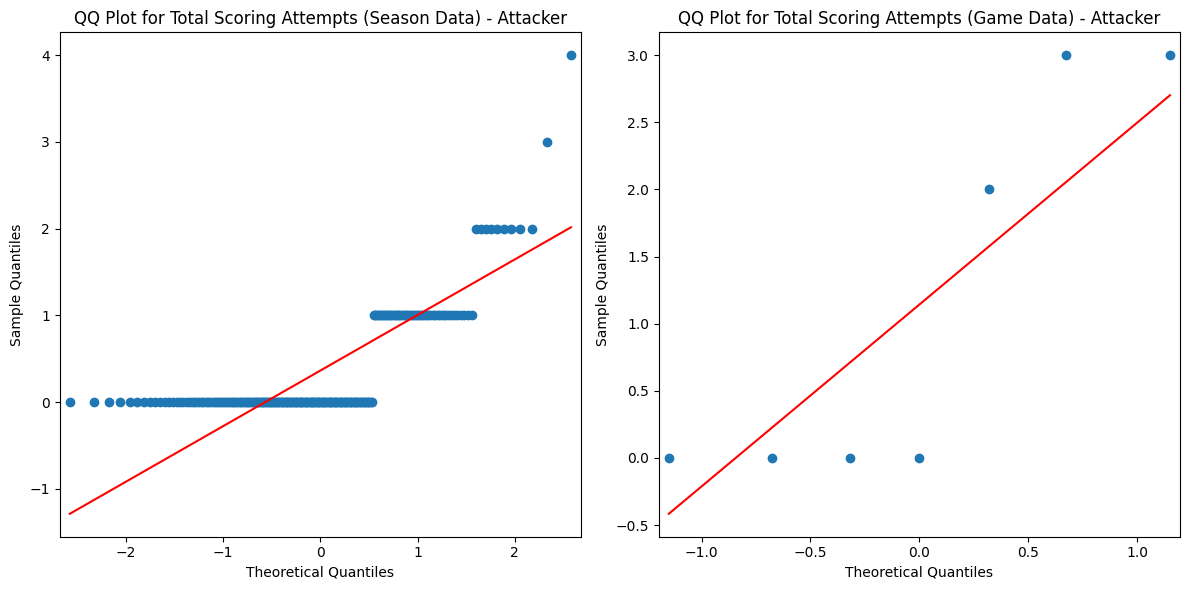

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/stats/_axis_nan_policy.py:573: UserWarning: scipy.stats.shapiro: Input data has range zero. The results may not be accurate.
  res = hypotest_fun_out(*samples, **kwds)


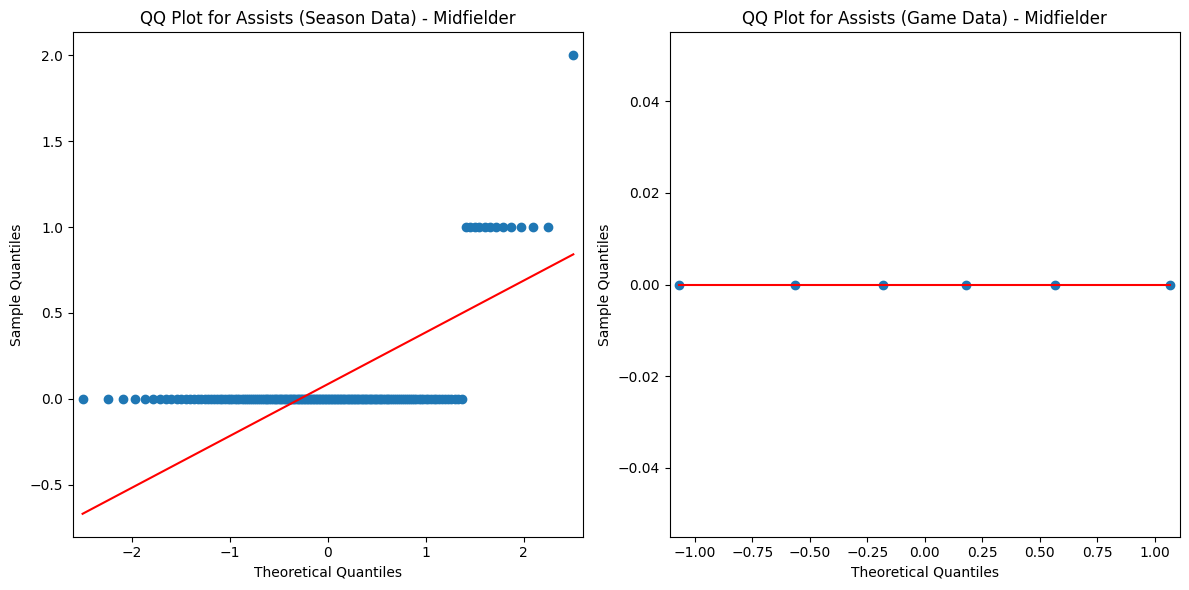

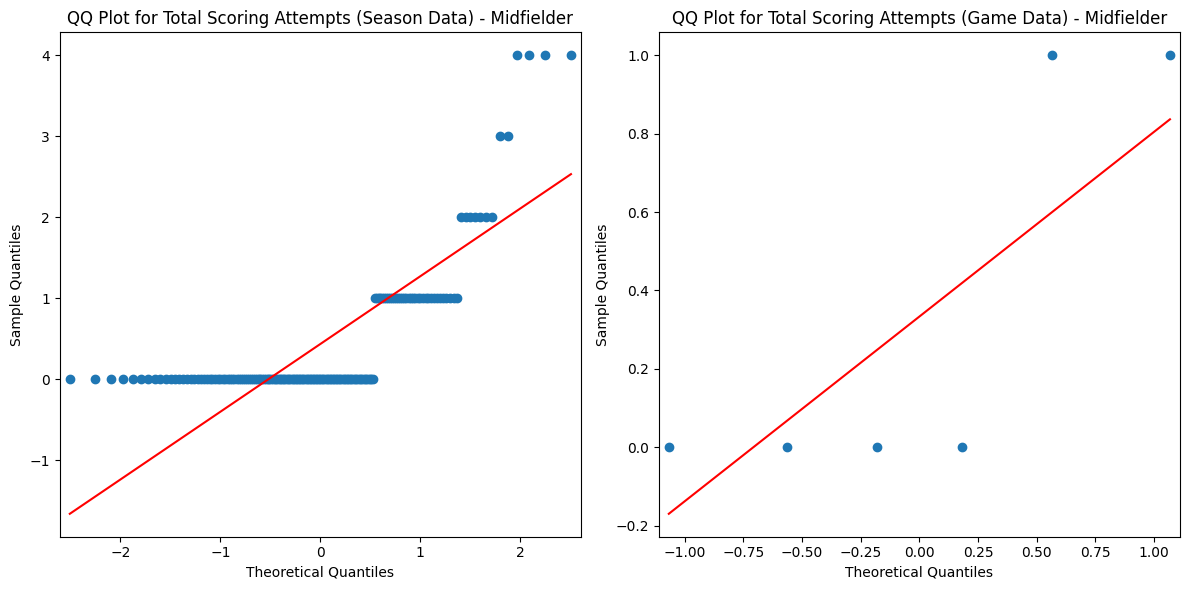

Results saved to Player_Role_Analysis.xlsx


In [16]:
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from statsmodels.graphics.gofplots import qqplot
import seaborn as sns
import matplotlib.pyplot as plt

# Define role-specific columns
role_columns = {
    'Attacker': ['Total Scoring Attempts'],
    'Midfielder': ['Assists', 'Total Scoring Attempts']
}

# Initialize a list to store results
results = []

# Function to check normality and plot distributions
def check_normality(data, column):
    stat, p_value = shapiro(data[column].dropna())
    return p_value > 0.05, stat, p_value

# Perform statistics for each role and column
for role, columns in role_columns.items():
    role_data = combined_season[(combined_season['Role'] == role) & (combined_season['Team'] == 'RBNY')]
    game_role_data = combined_game[(combined_game['Role'] == role) & (combined_game['Team'] == 'RBNY')]

    for column in columns:
        # Check normality for season and game data
        season_normal, season_stat, season_p = check_normality(role_data, column)
        game_normal, game_stat, game_p = check_normality(game_role_data, column)
        
        # Create QQ plots for season and game data
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        qqplot(role_data[column].dropna(), line='s', ax=plt.gca())
        plt.title(f'QQ Plot for {column} (Season Data) - {role}')

        plt.subplot(1, 2, 2)
        qqplot(game_role_data[column].dropna(), line='s', ax=plt.gca())
        plt.title(f'QQ Plot for {column} (Game Data) - {role}')
        plt.tight_layout()
        plt.show()
        
        # Perform statistical test between season and game data
        if season_normal and game_normal:
            # Use t-test
            test_name = "T-Test"
            stat, p_value = ttest_ind(role_data[column].dropna(), game_role_data[column].dropna())
        else:
            # Use Mann-Whitney U test
            test_name = "Mann-Whitney U Test"
            stat, p_value = mannwhitneyu(role_data[column].dropna(), game_role_data[column].dropna())
        
        # Determine conclusion
        conclusion = "Significant Difference" if p_value < 0.05 else "No Significant Difference"
        
        # Append re sults to the list
        results.append({
            'Role': role,
            'Metric': column,
            'Season Normal (P-Value)': season_p,
            'Game Normal (P-Value)': game_p,
            'Test Used': test_name,
            'Test Stat': stat,
            'P-Value': p_value,
            'Conclusion': conclusion
        })

# Convert results to a DataFrame
results_df = pd.DataFrame(results)

# Export results to an Excel file
output_file = "Player_Role_Analysis.xlsx"
with pd.ExcelWriter(output_file, engine='xlsxwriter') as writer:
    results_df.to_excel(writer, index=False, sheet_name='Analysis Results')
    print(f"Results saved to {output_file}")


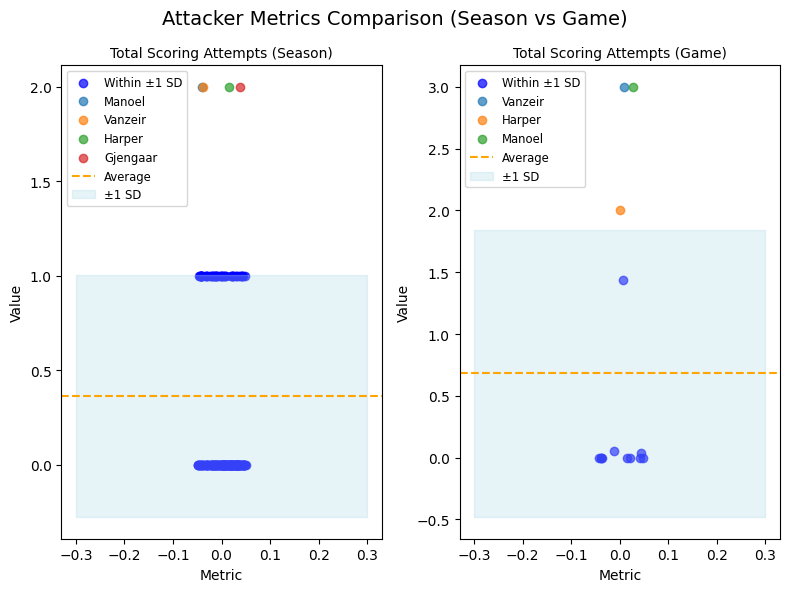

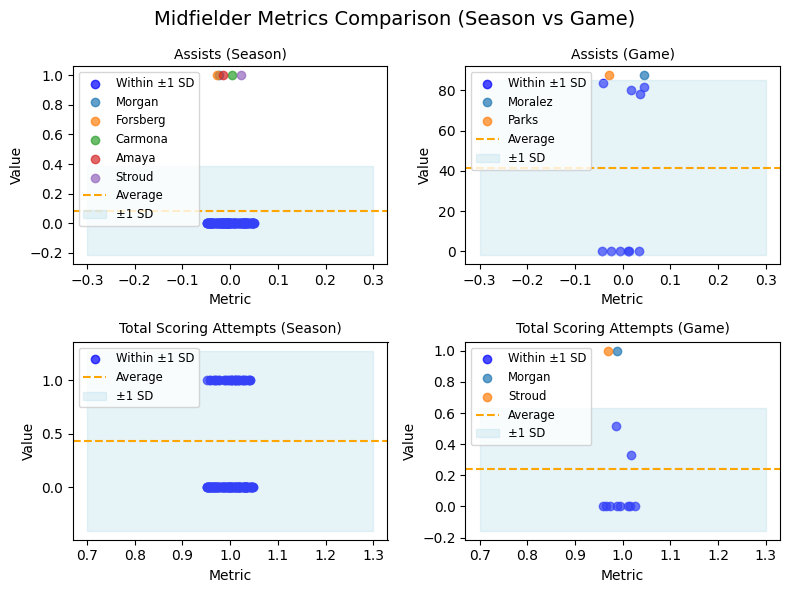

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Define role-specific columns
role_columns = {
    'Attacker': ['Total Scoring Attempts'],
    'Midfielder': ['Assists', 'Total Scoring Attempts']
}

# Create plots for each role and its columns
for role, columns in role_columns.items():
    # Filter data for the current role and metrics
    role_data_season = combined_season[combined_season['Role'] == role]
    role_data_game = combined_game[combined_game['Role'] == role]
    
    # Create a figure with two subplots (one for season and one for game)
    plt.figure(figsize=(8,6))  # Adjusted the height of the figure for more compactness

    # Prepare a set for names added to the legend to avoid repetition
    added_names_season = set()
    added_names_game = set()
    jitter_strength = 0.05  # Strength of jitter (can be adjusted)

    for idx, metric in enumerate(columns):
        if metric not in role_data_season.columns or metric not in role_data_game.columns:  # Ensure the metric is present in the data
            continue

        # Prepare season data
        metric_data_season = role_data_season[metric].dropna()
        avg_value_season = metric_data_season.mean()
        std_dev_season = metric_data_season.std()
        
        # Prepare game data
        metric_data_game = role_data_game[metric].dropna()
        avg_value_game = metric_data_game.mean()
        std_dev_game = metric_data_game.std()

        # Create subplot for the season data
        plt.subplot(len(columns), 2, 2 * idx + 1)

        inside_std_season = []  # Players inside ±1 SD for season
        outside_std_season = []  # Players outside ±1 SD for season
        outside_names_season = []  # Names of players outside ±1 SD for season
        
        for i, value in enumerate(metric_data_season):
            player_name = role_data_season.iloc[i]['Last Name']  # Get player name
            if avg_value_season - std_dev_season <= value <= avg_value_season + std_dev_season:
                inside_std_season.append((idx, value))
            else:
                if player_name not in added_names_season:
                    outside_names_season.append((idx, value, player_name))
                    added_names_season.add(player_name)

        # Plot players inside ±1 SD in blue for season data
        if inside_std_season:
            inside_x_season, inside_y_season = zip(*inside_std_season)
            jittered_x_season = [x + np.random.uniform(-jitter_strength, jitter_strength) for x in inside_x_season]
            plt.scatter(
                x=jittered_x_season,
                y=inside_y_season,
                color='blue',
                label='Within ±1 SD',
                alpha=0.7
            )

        # Plot players outside ±1 SD in unique colors for season data
        for (x, y, name) in outside_names_season:
            jittered_x_season = x + np.random.uniform(-jitter_strength, jitter_strength)
            plt.scatter(
                x=[jittered_x_season],
                y=[y],
                label=name,
                alpha=0.7
            )

        # Horizontal line for the mean (season)
        plt.axhline(y=avg_value_season, color='orange', linestyle='--', label='Average')

        # Shaded area for ±1 standard deviation (season)
        plt.fill_betweenx(
            y=np.linspace(avg_value_season - std_dev_season, avg_value_season + std_dev_season, 100),
            x1=idx - 0.3,
            x2=idx + 0.3,
            color='lightblue',
            alpha=0.3,
            label='±1 SD'
        )

        plt.title(f"{metric} (Season)", fontsize=10)
        plt.xlabel('Metric')
        plt.ylabel('Value')

        # Add legend to the current subplot (for season data)
        plt.legend(loc='upper left', fontsize='small')

        # Create subplot for the game data (second plot in each row)
        plt.subplot(len(columns), 2, 2 * idx + 2)

        inside_std_game = []  # Players inside ±1 SD for game
        outside_std_game = []  # Players outside ±1 SD for game
        outside_names_game = []  # Names of players outside ±1 SD for game

        for i, value in enumerate(metric_data_game):
            player_name = role_data_game.iloc[i]['Last Name']  # Get player name
            if avg_value_game - std_dev_game <= value <= avg_value_game + std_dev_game:
                inside_std_game.append((idx, value))
            else:
                if player_name not in added_names_game:
                    outside_names_game.append((idx, value, player_name))
                    added_names_game.add(player_name)

        # Plot players inside ±1 SD in blue for game data
        if inside_std_game:
            inside_x_game, inside_y_game = zip(*inside_std_game)
            jittered_x_game = [x + np.random.uniform(-jitter_strength, jitter_strength) for x in inside_x_game]
            plt.scatter(
                x=jittered_x_game,
                y=inside_y_game,
                color='blue',
                label='Within ±1 SD',
                alpha=0.7
            )

        # Plot players outside ±1 SD in unique colors for game data
        for (x, y, name) in outside_names_game:
            jittered_x_game = x + np.random.uniform(-jitter_strength, jitter_strength)
            plt.scatter(
                x=[jittered_x_game],
                y=[y],
                label=name,
                alpha=0.7
            )

        # Horizontal line for the mean (game)
        plt.axhline(y=avg_value_game, color='orange', linestyle='--', label='Average')

        # Shaded area for ±1 standard deviation (game)
        plt.fill_betweenx(
            y=np.linspace(avg_value_game - std_dev_game, avg_value_game + std_dev_game, 100),
            x1=idx - 0.3,
            x2=idx + 0.3,
            color='lightblue',
            alpha=0.3,
            label='±1 SD'
        )

        plt.title(f"{metric} (Game)", fontsize=10)
        plt.xlabel('Metric')
        plt.ylabel('Value')

        # Add legend to the current subplot (for game data)
        plt.legend(loc='upper left', fontsize='small')

    # Adjust layout and show the plot
    plt.suptitle(f'{role} Metrics Comparison (Season vs Game)', fontsize=14)
    plt.tight_layout()
    plt.show()



In [18]:
# Import required libraries
import numpy as np

# Filter metrics with significant differences
significant_metrics = results_df[results_df['Conclusion'] == 'Significant Difference']

# Create plots for each role with significant metrics
for role, columns in role_columns.items():
    # Get significant metrics for the current role
    role_significant_metrics = significant_metrics[significant_metrics['Role'] == role]['Metric'].tolist()
    
    # Skip if no significant metrics are found
    if not role_significant_metrics:
        print(f"No significant metrics for {role}.")
        continue

    # Filter data for the current role and metrics
    role_data = combined_season[combined_season['Role'] == role]
    
    plt.figure(figsize=(12, 6))

    for idx, metric in enumerate(role_significant_metrics):
        metric_data = role_data[metric].dropna()
        avg_value = metric_data.mean()
        std_dev = metric_data.std()
        
        # Create a subplot for each metric
        plt.subplot(1, len(role_significant_metrics), idx + 1)

        # Scatter plot for individual player values
        plt.scatter(
            x=np.full_like(metric_data, idx),  # All dots align to this metric's position
            y=metric_data,
            color='blue',
            label='Player Values',
            alpha=0.7
        )

        # Horizontal line for the mean
        plt.axhline(y=avg_value, color='orange', linestyle='--', label='Average')

        # Shaded area for ±1 standard deviation
        plt.fill_betweenx(
            y=np.linspace(avg_value - std_dev, avg_value + std_dev, 100),
            x1=idx - 0.3,  # Start of shaded area (adjust width as needed)
            x2=idx + 0.3,  # End of shaded area
            color='lightblue',
            alpha=0.3,
            label='±1 SD'
        )

        # Set labels and title
        plt.title(metric, fontsize=10)
        plt.xlabel('Metric')
        plt.ylabel('Value')

    # Add a legend and layout adjustments
    plt.suptitle(f'{role} Metrics with Significant Differences', fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.tight_layout()
    plt.show()


No significant metrics for Attacker.
No significant metrics for Midfielder.


In [19]:
# Import required libraries
import numpy as np

# Filter metrics with significant differences
significant_metrics = results_df[results_df['Conclusion'] == 'Significant Difference']

# Create plots for each role with significant metrics
for role, columns in role_columns.items():
    # Get significant metrics for the current role
    role_significant_metrics = significant_metrics[significant_metrics['Role'] == role]['Metric'].tolist()
    
    # Skip if no significant metrics are found
    if not role_significant_metrics:
        print(f"No significant metrics for {role}.")
        continue

    # Filter data for the current role and metrics
    role_data = combined_season[combined_season['Role'] == role]
    
    plt.figure(figsize=(12, 6))

    for idx, metric in enumerate(role_significant_metrics):
        metric_data = role_data[metric].dropna()
        avg_value = metric_data.mean()
        std_dev = metric_data.std()
        
        # Create a subplot for each metric
        plt.subplot(1, len(role_significant_metrics), idx + 1)

        # Scatter plot for individual player values
        inside_std = []  # Players inside ±1 SD
        outside_std = []  # Players outside ±1 SD
        outside_names = []  # Names of players outside ±1 SD
        
        for i, value in enumerate(metric_data):
            player_name = role_data.iloc[i]['Last Name']  # Get player name
            if avg_value - std_dev <= value <= avg_value + std_dev:
                inside_std.append((idx, value))
            else:
                outside_std.append((idx, value))
                outside_names.append(player_name)

        # Plot players inside ±1 SD in blue
        if inside_std:
            inside_x, inside_y = zip(*inside_std)
            plt.scatter(
                x=inside_x,
                y=inside_y,
                color='blue',
                label='Within ±1 SD',
                alpha=0.7
            )

        # Plot players outside ±1 SD in unique colors
        for (x, y), name in zip(outside_std, outside_names):
            plt.scatter(
                x=[x],
                y=[y],
                label=name,
                alpha=0.7
            )

        # Horizontal line for the mean
        plt.axhline(y=avg_value, color='orange', linestyle='--', label='Average')

        # Shaded area for ±1 standard deviation
        plt.fill_betweenx(
            y=np.linspace(avg_value - std_dev, avg_value + std_dev, 100),
            x1=idx - 0.3,  # Start of shaded area (adjust width as needed)
            x2=idx + 0.3,  # End of shaded area
            color='lightblue',
            alpha=0.3,
            label='±1 SD'
        )

        # Set labels and title
        plt.title(metric, fontsize=10)
        plt.xlabel('Metric')
        plt.ylabel('Value')

    # Add a legend and layout adjustments
    plt.suptitle(f'{role} Metrics with Significant Differences', fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.tight_layout()
    plt.show()


No significant metrics for Attacker.
No significant metrics for Midfielder.


In [20]:
# Import required libraries
import numpy as np

# Filter metrics with significant differences
significant_metrics = results_df[results_df['Conclusion'] == 'Significant Difference']

# Create plots for each role with significant metrics
for role, columns in role_columns.items():
    # Get significant metrics for the current role
    role_significant_metrics = significant_metrics[significant_metrics['Role'] == role]['Metric'].tolist()
    
    # Skip if no significant metrics are found
    if not role_significant_metrics:
        print(f"No significant metrics for {role}.")
        continue

    # Filter data for the current role and metrics
    role_data = combined_season[combined_season['Role'] == role]
    game_role_data = combined_game[combined_game['Role'] == role]
    
    plt.figure(figsize=(12, 6))

    for idx, metric in enumerate(role_significant_metrics):
        # Extract season data for the metric
        metric_data = role_data[metric].dropna()
        avg_value = metric_data.mean()
        std_dev = metric_data.std()

        # Create a subplot for each metric
        plt.subplot(1, len(role_significant_metrics), idx + 1)

        # Scatter plot for individual player values (season data)
        inside_std = []  # Players inside ±1 SD
        outside_std = []  # Players outside ±1 SD
        outside_names = []  # Names of players outside ±1 SD

        for i, value in enumerate(metric_data):
            player_name = role_data.iloc[i]['Last Name']  # Get player name
            if avg_value - std_dev <= value <= avg_value + std_dev:
                inside_std.append((idx, value))
            else:
                outside_std.append((idx, value))
                outside_names.append(player_name)

        # Plot players inside ±1 SD in blue
        if inside_std:
            inside_x, inside_y = zip(*inside_std)
            plt.scatter(
                x=inside_x,
                y=inside_y,
                color='blue',
                label='Within ±1 SD',
                alpha=0.7
            )

        # Plot players outside ±1 SD in unique colors
        for (x, y), name in zip(outside_std, outside_names):
            plt.scatter(
                x=[x],
                y=[y],
                label=name,
                alpha=0.7
            )

        # Horizontal line for the mean
        plt.axhline(y=avg_value, color='orange', linestyle='--', label='Average')

        # Shaded area for ±1 standard deviation
        plt.fill_betweenx(
            y=np.linspace(avg_value - std_dev, avg_value + std_dev, 100),
            x1=idx - 0.3,  # Start of shaded area (adjust width as needed)
            x2=idx + 0.3,  # End of shaded area
            color='lightblue',
            alpha=0.3,
            label='±1 SD'
        )

        # Plot stars for game-specific values
        game_metric_data = game_role_data[metric].dropna()  # Get game-specific values
        for i, value in enumerate(game_metric_data):
            if avg_value - std_dev <= value <= avg_value + std_dev:  # Inside SD
                plt.scatter(
                    x=[idx],  # Keep same x position for the metric
                    y=[value],
                    color='green',
                    marker='*',  # Star marker
                    label=f"{game_role_data.iloc[i]['Last Name']} (Game)",
                    s=100,  # Larger size for stars
                    alpha=0.8
                )
            else:  # Outside SD
                plt.scatter(
                    x=[idx],
                    y=[value],
                    color='red',
                    marker='*',
                    label=f"{game_role_data.iloc[i]['Last Name']} (Game)",
                    s=100,  # Larger size for stars
                    alpha=0.8
                )

        # Set labels and title
        plt.title(metric, fontsize=10)
        plt.xlabel('Metric')
        plt.ylabel('Value')

    # Add a legend and layout adjustments
    plt.suptitle(f'{role} Metrics with Significant Differences', fontsize=14)
    plt.legend(loc='upper left', bbox_to_anchor=(1.05, 1), fontsize='small')
    plt.tight_layout()
    plt.show()


No significant metrics for Attacker.
No significant metrics for Midfielder.
